# Metis Take Home Practice

We will be using New York City CitiBike data for this analysis. 

CitiBike is New York City's public bike sharing program which opened in May 2013. 
* Bicycles are rented and then returned to various stations located throughout Manhattan, Brooklyn, and Queens. 
* Memberships and various time-limited passes are available for purchase.

Historical CitiBike usage data can be downloaded [here](https://s3.amazonaws.com/tripdata/index.html).

Python libraries should be used to answer all questions except the last one, where any tool(s) can be used. 

Your analysis should be performed and annotated so that it could easily be handed off to another data scientist in the group. 

This exercise is designed to require 4 – 8 hours to complete.

## Question 1

• Programmatically acquire, load, and prepare CitiBike data for the year 2015.

• How many data points are there in the data used for analysis?

In [ ]:
# First, download the zip files

!wget https://s3.amazonaws.com/tripdata/201501-citibike-tripdata.zip
!wget https://s3.amazonaws.com/tripdata/201502-citibike-tripdata.zip
!wget https://s3.amazonaws.com/tripdata/201503-citibike-tripdata.zip
!wget https://s3.amazonaws.com/tripdata/201504-citibike-tripdata.zip
!wget https://s3.amazonaws.com/tripdata/201505-citibike-tripdata.zip
!wget https://s3.amazonaws.com/tripdata/201506-citibike-tripdata.zip
!wget https://s3.amazonaws.com/tripdata/201507-citibike-tripdata.zip
!wget https://s3.amazonaws.com/tripdata/201508-citibike-tripdata.zip
!wget https://s3.amazonaws.com/tripdata/201509-citibike-tripdata.zip
!wget https://s3.amazonaws.com/tripdata/201510-citibike-tripdata.zip
!wget https://s3.amazonaws.com/tripdata/201511-citibike-tripdata.zip
!wget https://s3.amazonaws.com/tripdata/201512-citibike-tripdata.zip

In [ ]:
# Lets unzip the files and delete them once we have the csvs

import os, zipfile

dir_name = '/Users/ausubo/ds/my_projects/PRACTICE/citi_bike_data/'
extension = ".zip"

os.chdir(dir_name) # change directory from working dir to dir with files

for item in os.listdir(dir_name): # loop through items in dir
    if item.endswith(extension): # check for ".zip" extension
        file_name = os.path.abspath(item) # get full path of files
        zip_ref = zipfile.ZipFile(file_name) # create zipfile object
        zip_ref.extractall(dir_name) # extract file to dir
        zip_ref.close() # close file
        os.remove(file_name) # delete zipped file

In [ ]:
# Place data in pandas dataframes. 
import pandas as pd

trips_01 = pd.read_csv('201501-citibike-tripdata.csv')
trips_02 = pd.read_csv('201502-citibike-tripdata.csv')
trips_03 = pd.read_csv('201503-citibike-tripdata.csv')
trips_04 = pd.read_csv('201504-citibike-tripdata.csv')
trips_05 = pd.read_csv('201505-citibike-tripdata.csv')
trips_06 = pd.read_csv('201506-citibike-tripdata.csv')
trips_07 = pd.read_csv('201507-citibike-tripdata.csv')
trips_08 = pd.read_csv('201508-citibike-tripdata.csv')
trips_09 = pd.read_csv('201509-citibike-tripdata.csv')
trips_10 = pd.read_csv('201510-citibike-tripdata.csv')
trips_11 = pd.read_csv('201511-citibike-tripdata.csv')
trips_12 = pd.read_csv('201512-citibike-tripdata.csv')

In [ ]:
# Concatenate dataframes
df = pd.concat([trips_01, trips_02, trips_03, trips_04, trips_05, trips_06, trips_07, trips_08,
                     trips_09, trips_10, trips_11, trips_12], ignore_index = True)

Save the raw data to ONE csv file. 

In [ ]:
df.to_csv('2015_citibike_trips.csv')

In [ ]:
!say "done"

Ok, now the file is in one single csv file ... From now on:
# START HERE. 

In [1]:
import pandas as pd
df = pd.read_csv('2015_citibike_trips.csv')

How many data points are there in the data used for the analysis?

In [2]:
df.shape[0]

9937969

> 9937969 trips in 2015

In [3]:
df.columns

Index(['Unnamed: 0', 'tripduration', 'starttime', 'stoptime',
       'start station id', 'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

## Question 2

• Plot the distribution of the trip duration.

• Describe the structure and hypotheses you have about that structure.

In [4]:
df['minutes'] = df.tripduration / 60  # let's calculate the trip duration in minutes

In [5]:
'usertype'in list(df.columns)

True

In [6]:
df['usertype'].value_counts()

Subscriber    8626638
Customer      1311331
Name: usertype, dtype: int64

Most rides on 2015 were initiated by subscribers, not day-pass holders (customers). 

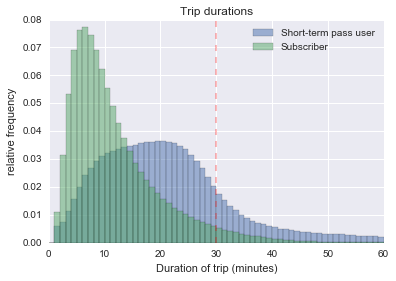

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

# Plot the distribution of trip duration (in minutes) segmented by user type
df.groupby('usertype')['minutes'].hist(bins = np.arange(61), alpha = 0.5, normed = True)
plt.xlabel('Duration of trip (minutes)')
plt.ylabel('relative frequency')
plt.title('Trip durations')
plt.legend(['Short-term pass user', 'Subscriber'])
plt.axvline(30, linestyle="--", color = 'red', alpha = 0.3)

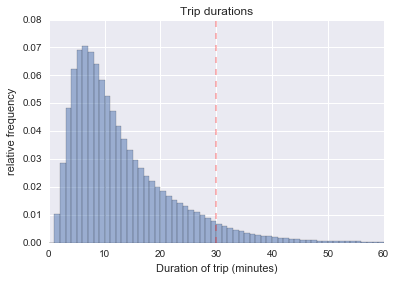

In [8]:
# Let's plot the distribution of trip duration overall 
df['minutes'].hist(bins = np.arange(61), alpha = 0.5, normed = True)
plt.xlabel("Duration of trip (minutes)")
plt.ylabel('relative frequency')
plt.title("Trip durations")
plt.axvline(30, linestyle="--", color = 'red', alpha = 0.3)

As of the end of January 2017, Day Passes include unlimited 30-min rides and Annual Memberships include unlimited 45-min rides. 
* Maybe in 2015 it was 30 minutes for both?

Overall trip duration distribution: lognormal. 

Subscribers don't use bikes as long as short-term users. 

Maybe subscribers use bike for different purpose, like commuting? 

It would be interesting to incorporate analysis of when the bikes are used during the day segmented by type of user. 



In [9]:
median_duration = df['minutes'].median()

In [10]:
median_duration = str(round(median_duration, 1))

In [11]:
print("Half of all trips lasted less than %s minutes." % median_duration)

Half of all trips lasted less than 10.5 minutes.


In [12]:
mean_duration = df['minutes'].mean()
mean_duration = str(round(mean_duration, 1))
print("The average trip duration in this time period is %s minutes." % mean_duration)

The average trip duration in this time period is 16.1 minutes.


The distribution of trip duration is heavily right skewed and looks like a lognormal distribution. 

* Next steps: 
    - use scipy.stats to fit different distributions to the distribution of trip duration time.

## Question 3

• Make a plot of the total number of trips per hour of the day.

• What does this plot look like if days are broken into weekdays vs weekends? What does this usage pattern tell you?

• Find another interesting way to segment all or some of the data. Discuss your findings.

### Let's explore trips over time

In [13]:
df.head()

,Unnamed: 0,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,minutes
0,0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,22.433333
1,1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,6.050000
2,2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,5.766667
3,3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,3.033333
4,4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,16.150000


In [14]:
starttime = list(df['starttime'])

In [15]:
stoptime = list(df['stoptime'])

Usually, using something like:
```python
df['start_time'] = pd.to_datetime(df['starttime'], format='%m/%d/%Y %H:%M:%S')    
df['stop_time'] = pd.to_datetime(df['stoptime'], format='%m/%d/%Y %H:%M:%S')
```
would suffice, or asking pd.read_csv(filename, ...) when importing the data to infer the datetime format, but, as shown below, the strings have different formats. 

In [16]:
df.head(1)

,Unnamed: 0,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,minutes
0,0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.75002,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,22.433333


In [17]:
df.tail(1)

,Unnamed: 0,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,minutes
9937968,9937968,395,12/31/2015 21:49:19,12/31/2015 21:55:55,3242,Schermerhorn St & Court St,40.691029,-73.991834,418,Front St & Gold St,40.70224,-73.982578,23411,Subscriber,1968.0,1,6.583333


Ok, I'll deal with this with try/except statements.

There might be a better way?? The implementation below is slow. 

In [24]:
def change_datetime(t):
    try:
        t1 = datetime.strptime(t, '%m/%d/%Y %H:%M')
    except:
        t1 = datetime.strptime(t, '%m/%d/%Y %H:%M:%S')
    return t1

In [25]:
df['start_time'] = df['starttime'].apply(change_datetime)
df['stop_time'] = df['stoptime'].apply(change_datetime)

``` python

from datetime import datetime

start_time = []
for i in starttime:
    try:
        start_time.append(datetime.strptime(i, '%m/%d/%Y %H:%M'))
    except:
        start_time.append(datetime.strptime(i, '%m/%d/%Y %H:%M:%S'))
```

```python
stop_time = []
for i in stoptime:
    try:
        stop_time.append(datetime.strptime(i, '%m/%d/%Y %H:%M'))
    except:
        stop_time.append(datetime.strptime(i, '%m/%d/%Y %H:%M:%S'))
        
df['start_time'] = start_time
df['stop_time'] = stop_time
```

In [26]:
# Find the start date

ind = pd.DatetimeIndex(df.start_time)
df['date'] = ind.date.astype('datetime64')
df['hour'] = ind.hour

In [27]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'minutes', 'start_time', 'stop_time', 'date',
       'hour'],
      dtype='object')

#### Count trips by date and segment by usertype! 

In [29]:
by_date = df.pivot_table('tripduration', aggfunc='count', 
                         index = 'date',
                        columns = 'usertype',)

In [30]:
by_date.tail()

usertype,Customer,Subscriber
date,,
2015-12-27,3159,10018
2015-12-28,2448,16441
2015-12-29,754,12593
2015-12-30,2532,19945
2015-12-31,3096,17280


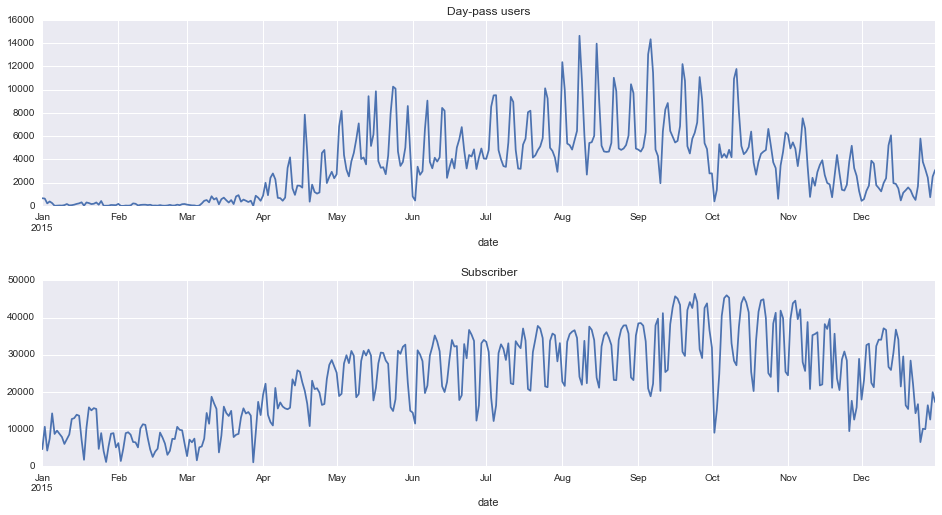

In [31]:
fig,ax = plt.subplots(2, figsize=(16,8))
fig.subplots_adjust(hspace = 0.4)
by_date.iloc[:,0].plot(ax=ax[0], title='Day-pass users');
by_date.iloc[:,1].plot(ax=ax[1], title='Subscriber')

Daily trends: day-pass users (top), subscribers (bottom). 

It is clear that there is a weekly pattern of bike use (there are 4-5 peaks per month in the data). The number of day-pass user rides spikes in the month of August -- possibly because of the nice summer weather. When do tourists mostly visit NYC? The number of subscriber rides has a stready pattern from May until September; there is some interesting structure in the data around Labor Day weekend, the end of summer. The number of rides initiated by subscribers is highest right after Labor Day weekend, perhaps because more people have subscribed to the service after this date? 

#### Explore weekly and hourly trends segmenting by usertype.

In [32]:
list(set(by_date.index.dayofweek)) #Mondays = 0

[0, 1, 2, 3, 4, 5, 6]

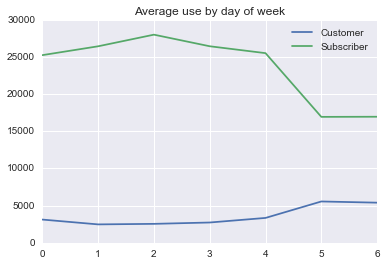

In [33]:
by_weekday = by_date.groupby(by_date.index.dayofweek).mean()
by_weekday.columns.name = None
by_weekday.plot(title = 'Average use by day of week')


In [35]:
by_weekday['ratio'] = by_weekday['Subscriber']/by_weekday['Customer']
by_weekday

,Customer,Subscriber,ratio
0,3122.865385,25223.019231,8.076883
1,2474.192308,26412.673077,10.675271
2,2546.173077,27975.096154,10.987115
3,2728.320755,26417.226415,9.682596
4,3343.807692,25490.980769,7.623339
5,5555.576923,16926.019231,3.046672
6,5394.500000,16943.846154,3.140948


Subscribers use the bikes, on average, much more than pass users.

Whereas subscribers use the bikes the most during weekdays, pass customers use the bike more during weekends. 

In [36]:
by_hour = df.pivot_table('tripduration', aggfunc = 'count',
                        index=['date','hour'], 
                        columns = 'usertype').fillna(0).reset_index('hour')

In [37]:
by_hour.tail()

usertype,hour,Customer,Subscriber
date,,,
2015-12-31,19,86.0,584.0
2015-12-31,20,87.0,429.0
2015-12-31,21,112.0,346.0
2015-12-31,22,101.0,266.0
2015-12-31,23,72.0,182.0


In [38]:
by_hour['weekend'] = (by_hour.index.dayofweek >=5)

In [39]:
by_hour.head()

usertype,hour,Customer,Subscriber,weekend
date,,,,
2015-01-01,0,10.0,104.0,False
2015-01-01,1,13.0,139.0,False
2015-01-01,2,12.0,134.0,False
2015-01-01,3,4.0,79.0,False
2015-01-01,4,4.0,36.0,False


In [40]:
by_hour = by_hour.groupby(['weekend','hour']).mean()

In [41]:
by_hour.tail()

usertype        Customer  Subscriber
weekend hour                        
True    19    284.144231  979.903846
        20    192.519231  695.884615
        21    134.115385  533.211538
        22    104.528846  437.057692
        23     78.701923  326.807692

In [42]:
by_hour.index.set_levels([['weekday', 'weekend'],
                         ["{0}:00".format(i) for i in range(24)]],
                        inplace = True)
by_hour.columns.name = None

In [43]:
by_hour.tail()

Customer  Subscriber
weekend hour                         
weekend 19:00  284.144231  979.903846
        20:00  192.519231  695.884615
        21:00  134.115385  533.211538
        22:00  104.528846  437.057692
        23:00   78.701923  326.807692

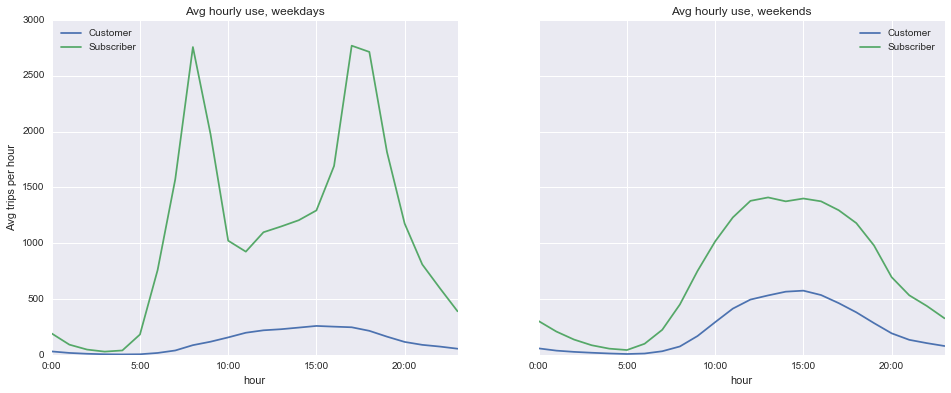

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(16,6), sharey=True)
by_hour.loc['weekday'].plot(title='Avg hourly use, weekdays', ax = ax[0])
by_hour.loc['weekend'].plot(title='Avg hourly use, weekends', ax =ax[1])
ax[0].set_ylabel('Avg trips per hour')

Subscribers use the bike differently during weekdays and weekends. 
- More avg trips during weekday commute times!

Subscriber weekday use is driven by commuting: avg hourly use for subscribers peaks in the early morning and late afternoon of weekdays. 

Subscriber weekend use and pass user weekday/end use peak during the early hours of the afternoon.

In [45]:
# Same analysis; different aggregating function: count instead of average

by_hour = df.pivot_table('tripduration', aggfunc = 'count',
                        index=['date','hour'], 
                        columns = 'usertype').fillna(0).reset_index('hour')

by_hour['weekend'] = (by_hour.index.dayofweek >=5)
by_hour = by_hour.groupby(['weekend','hour']).sum()
by_hour.index.set_levels([['weekday', 'weekend'],
                         ["{0}:00".format(i) for i in range(24)]],
                        inplace = True)
by_hour.columns.name = None

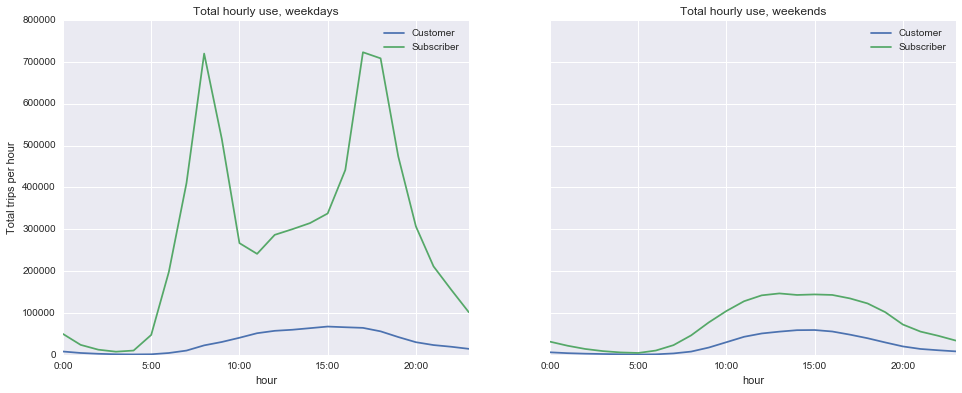

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(16,6), sharey=True)
by_hour.loc['weekday'].plot(title='Total hourly use, weekdays', ax = ax[0])
by_hour.loc['weekend'].plot(title='Total hourly use, weekends', ax =ax[1])
ax[0].set_ylabel('Total trips per hour')

Total hourly use during weekends + weekdays for subscribers + pass-users follow same patterns as those described above for avg hourly use. 

- - - 
Let's plot the total number of trips per hour of the day.

In [47]:
df_hour = df.groupby('hour').count().reset_index()

In [48]:
df_hour.head()

,hour,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,minutes,start_time,stop_time,date
0,0,95057,95057,95057,95057,95057,95057,95057,95057,95057,95057,95057,95057,95057,81213,95057,95057,95057,95057,95057
1,1,53664,53664,53664,53664,53664,53664,53664,53664,53664,53664,53664,53664,53664,45394,53664,53664,53664,53664,53664
2,2,31271,31271,31271,31271,31271,31271,31271,31271,31271,31271,31271,31271,31271,26178,31271,31271,31271,31271,31271
3,3,19409,19409,19409,19409,19409,19409,19409,19409,19409,19409,19409,19409,19409,16264,19409,19409,19409,19409,19409
4,4,17963,17963,17963,17963,17963,17963,17963,17963,17963,17963,17963,17963,17963,15830,17963,17963,17963,17963,17963


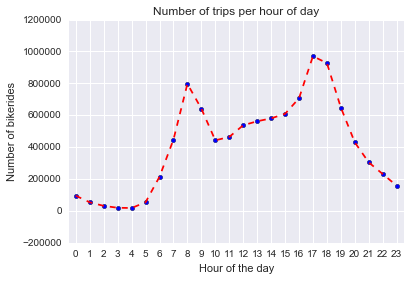

In [49]:
plt.scatter(df_hour['hour'], df_hour['tripduration'], s = 20)
plt.plot(df_hour['hour'], df_hour['tripduration'], 'r--')
plt.xticks(np.arange(24));
plt.xlim(-0.5,23.5)
plt.title('Number of trips per hour of day')
plt.xlabel('Hour of the day')
plt.ylabel('Number of bikerides')

(I could also do this analysis for gender instead of subscriber type.)

## Question 4

• There are instances where a bike's next trip originates from a different station than it was returned to for its most recent previous trip. What do you think causes this?

> Bikes are moved around the city. Supply and demand.   

• Explore this phenomenon.

In [50]:
df['start station id'].unique().shape[0]

488

In [51]:
df['end station id'].unique().shape[0]

498

Why are there more end stations than start stations? 

In [52]:
df['bikeid'].unique().shape[0]

8477

> There are 8477 unique bike ids.

In [53]:
df_sorted = df.sort_values(by = ['bikeid', 'start_time'])

In [54]:
df_sorted.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'minutes', 'start_time', 'stop_time', 'date',
       'hour'],
      dtype='object')

In [55]:
df_sorted.head(1)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,minutes,start_time,stop_time,date,hour
1524,332,1/1/2015 12:28,1/1/2015 12:34,326,E 11 St & 1 Ave,40.729538,-73.984267,497,E 17 St & Broadway,40.73705,-73.990093,14529,Subscriber,1982.0,1,5.533333,2015-01-01 12:28:00,2015-01-01 12:34:00,2015-01-01,12


Let's change the order in which we see the columns. 

In [56]:
columns = ['bikeid', 'start_time', 'stop_time', 'date','hour', 'tripduration', 'minutes', 'start station id', 'end station id','start station latitude', 'start station longitude', 'end station latitude', 'end station longitude', 'usertype', 'birth year', 'gender']

In [57]:
trips_df = df_sorted[columns].reset_index()
del trips_df['index']

In [58]:
trips_df.head(1)

,bikeid,start_time,stop_time,date,hour,tripduration,minutes,start station id,end station id,start station latitude,start station longitude,end station latitude,end station longitude,usertype,birth year,gender
0,14529,2015-01-01 12:28:00,2015-01-01 12:34:00,2015-01-01,12,332,5.533333,326,497,40.729538,-73.984267,40.73705,-73.990093,Subscriber,1982.0,1


In [59]:
trips_df.tail(1)

,bikeid,start_time,stop_time,date,hour,tripduration,minutes,start station id,end station id,start station latitude,start station longitude,end station latitude,end station longitude,usertype,birth year,gender
9937968,24769,2015-12-31 09:49:46,2015-12-31 10:04:00,2015-12-31,9,854,14.233333,417,390,40.712912,-74.010202,40.692216,-73.984284,Subscriber,1981.0,1


How to compare values from previous or subsequent rows?? 

http://stackoverflow.com/questions/30673209/pandas-compare-next-row


In [60]:
trips_df['previous bikeid'] = trips_df['bikeid'].shift(1)
trips_df['previous end station id'] = trips_df['end station id'].shift(1)

In [61]:
columns = list(trips_df.columns)
columns

['bikeid',
 'start_time',
 'stop_time',
 'date',
 'hour',
 'tripduration',
 'minutes',
 'start station id',
 'end station id',
 'start station latitude',
 'start station longitude',
 'end station latitude',
 'end station longitude',
 'usertype',
 'birth year',
 'gender',
 'previous bikeid',
 'previous end station id']

In [62]:
# Again, let's reorder the columns
columns = ['bikeid',
           'previous bikeid',
 'start_time',
 'stop_time',
 'date',
 'hour',
 'tripduration',
 'minutes',
 'previous end station id',
 'start station id',
 'end station id',
 'start station latitude',
 'start station longitude',
 'end station latitude',
 'end station longitude',
 'usertype',
 'birth year',
 'gender']

In [63]:
trips_df = trips_df[columns]

In [64]:
trips_df.head(1)

,bikeid,previous bikeid,start_time,stop_time,date,hour,tripduration,minutes,previous end station id,start station id,end station id,start station latitude,start station longitude,end station latitude,end station longitude,usertype,birth year,gender
0,14529,NaN,2015-01-01 12:28:00,2015-01-01 12:34:00,2015-01-01,12,332,5.533333,NaN,326,497,40.729538,-73.984267,40.73705,-73.990093,Subscriber,1982.0,1


In [65]:
# Which columns have missing values ? 
# what percentage is missing ? 
for i in trips_df.columns:
    print (i, (trips_df[i].isnull().sum())/len(trips_df))

bikeid 0.0
previous bikeid 1.00624181863e-07
start_time 0.0
stop_time 0.0
date 0.0
hour 0.0
tripduration 0.0
minutes 0.0
previous end station id 1.00624181863e-07
start station id 0.0
end station id 0.0
start station latitude 0.0
start station longitude 0.0
end station latitude 0.0
end station longitude 0.0
usertype 0.0
birth year 0.131956338362
gender 0.0


In [66]:
i = 'previous end station id'
trips_df[i].isnull().sum()

1

In [67]:
i = 'previous bikeid'
trips_df[i].isnull().sum()

1

NaN values are those corresponding to the first trip in the dataframe. 

Let's just assume that the bike corresponding to that first trip was left at the station were it was. (so previous bike id is 14529 and previous end station id is 326)

In [68]:
trips_df['previous end station id'] = trips_df['previous end station id'].fillna(326.0)
trips_df['previous bikeid'] = trips_df['previous bikeid'].fillna(14529)

In [69]:
trips_df['previous end station id'] = trips_df['previous end station id'].apply(int)
trips_df['previous bikeid'] = trips_df['previous bikeid'].apply(int)

In [70]:
trips_df['bikeid'].unique().shape[0] #number of unique bikeids

8477

Let's check the trips_df again. 

In [71]:
trips_df.head(1)

,bikeid,previous bikeid,start_time,stop_time,date,hour,tripduration,minutes,previous end station id,start station id,end station id,start station latitude,start station longitude,end station latitude,end station longitude,usertype,birth year,gender
0,14529,14529,2015-01-01 12:28:00,2015-01-01 12:34:00,2015-01-01,12,332,5.533333,326,326,497,40.729538,-73.984267,40.73705,-73.990093,Subscriber,1982.0,1


Let's filter the df to those trips where the bikeid and the previous bikeid correspond to each other, and where the previous end station id is not the same as the start station id. This dataframe has the information corresponding to when these bikes where moved around, where were they, etc. 

In [72]:
trips_df[(trips_df['previous end station id'] != trips_df['start station id']) & (trips_df['bikeid'] == trips_df['previous bikeid'])]

,bikeid,previous bikeid,start_time,stop_time,date,hour,tripduration,minutes,previous end station id,start station id,end station id,start station latitude,start station longitude,end station latitude,end station longitude,usertype,birth year,gender
2,14529,14529,2015-01-02 06:37:00,2015-01-02 06:55:00,2015-01-02,6,1112,18.533333,515,496,195,40.737262,-73.992390,40.709056,-74.010434,Subscriber,1964.0,2
8,14529,14529,2015-01-05 00:51:00,2015-01-05 02:30:00,2015-01-05,0,5942,99.033333,492,362,173,40.751726,-73.987535,40.760647,-73.984427,Customer,NaN,0
9,14529,14529,2015-01-05 18:15:00,2015-01-05 18:30:00,2015-01-05,18,925,15.416667,173,456,498,40.759711,-73.974023,40.748549,-73.988084,Subscriber,1962.0,1
14,14529,14529,2015-01-07 06:53:00,2015-01-07 07:05:00,2015-01-07,6,697,11.616667,529,379,497,40.749156,-73.991600,40.737050,-73.990093,Subscriber,1953.0,1
15,14529,14529,2015-01-08 10:54:00,2015-01-08 11:00:00,2015-01-08,10,349,5.816667,497,468,465,40.765265,-73.981923,40.755136,-73.986580,Subscriber,1979.0,1
22,14529,14529,2015-01-12 06:55:00,2015-01-12 07:02:00,2015-01-12,6,454,7.566667,477,465,359,40.755136,-73.986580,40.755103,-73.974987,Subscriber,1964.0,1
37,14529,14529,2015-01-13 09:01:00,2015-01-13 09:08:00,2015-01-13,9,432,7.200000,515,237,402,40.730473,-73.986724,40.740343,-73.989551,Subscriber,1980.0,1
67,14529,14529,2015-01-19 17:02:00,2015-01-19 17:10:00,2015-01-19,17,458,7.633333,499,520,526,40.759923,-73.976485,40.747659,-73.984907,Subscriber,1980.0,1
70,14529,14529,2015-01-20 08:41:00,2015-01-20 08:56:00,2015-01-20,8,891,14.850000,247,380,486,40.734011,-74.002939,40.746201,-73.988557,Subscriber,1976.0,1
71,14529,14529,2015-01-20 09:22:00,2015-01-20 09:32:00,2015-01-20,9,628,10.466667,486,465,455,40.755136,-73.986580,40.750020,-73.969053,Subscriber,1977.0,1


In [73]:
_.shape[0]

554607

In [74]:
rebalanced = _

In [75]:
total = trips_df.shape[0]

In [76]:
rebalanced/total

0.05580687563022183

In [77]:
fraction_rebalanced = round(rebalanced/total,2)

In [78]:
fraction_rebalanced

0.06

Bikes were moved around 6% of the time, taking into consideration all bike trips.

In [79]:
moved_bikes_df = trips_df[(trips_df['previous end station id'] != trips_df['start station id']) & (trips_df['bikeid'] == trips_df['previous bikeid'])]

In [80]:
trips_df.shape[0]

9937969

In [81]:
moved_bikes_df.shape[0]

554607

In [82]:
moved_bike_counts = moved_bikes_df.groupby('bikeid').count().reset_index()

In [83]:
moved_bike_counts.head(1)

,bikeid,previous bikeid,start_time,stop_time,date,hour,tripduration,minutes,previous end station id,start station id,end station id,start station latitude,start station longitude,end station latitude,end station longitude,usertype,birth year,gender
0,14529,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,83,91


In [84]:
moved_bike_counts.start_time.max()

139

In [86]:
moved_bike_counts.start_time.min()

1

In [87]:
moved_bike_counts.start_time.mean()

65.67282415630551

Bikes that were moved were moved an average of 65.7 times.

In [88]:
moved_bike_counts.start_time.sum() #ok, it checks out

554607

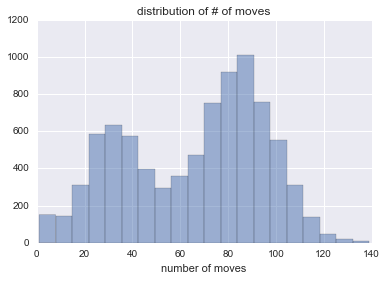

In [89]:
moved_bike_counts.start_time.hist(bins = 20, alpha = 0.5, normed = False)
plt.xlabel('number of moves')
plt.title('distribution of # of moves')

Bimodal distribution. Some bikes are definitely moved around more than others. Could have to do w/ location. Interesting that the structure of this distribution is similar to plot of # of trip rides by time of day. There is possibly a relation.
* What locations do people commute to and from? 
* What locations are the bikes most moved around to and from?

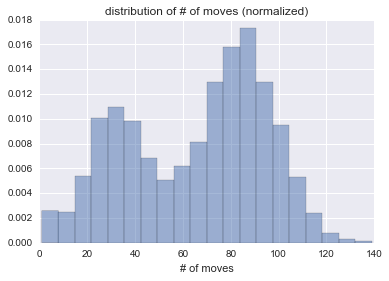

In [90]:
moved_bike_counts.start_time.hist(bins = 20, alpha = 0.5, normed = True)
plt.xlabel('# of moves')
plt.title('distribution of # of moves (normalized)')

(0, 23)

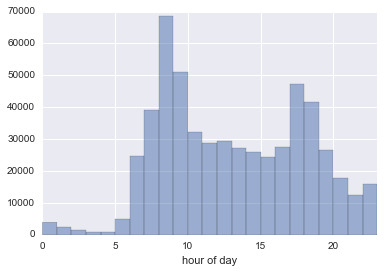

In [91]:
moved_bikes_df.hour.hist(bins = np.arange(24), alpha = 0.5)
plt.xlabel('hour of day')
plt.xlim(0, 23)

The plot above shows the distribution of the hour of the day when bikes where used after being moved. 

Bikes are moved around the most during commute times.

In [92]:
moved_bikes_df.head(1)

,bikeid,previous bikeid,start_time,stop_time,date,hour,tripduration,minutes,previous end station id,start station id,end station id,start station latitude,start station longitude,end station latitude,end station longitude,usertype,birth year,gender
2,14529,14529,2015-01-02 06:37:00,2015-01-02 06:55:00,2015-01-02,6,1112,18.533333,515,496,195,40.737262,-73.99239,40.709056,-74.010434,Subscriber,1964.0,2


## Let's go back to analyzing the trips. 
#### Let's add other time columns to trips_df 
(they might come in handy later, or not)

In [94]:
trips_df['month'] = trips_df.start_time.apply(lambda x: x.month)
trips_df['month'] = trips_df.start_time.apply(lambda x: x.month)

In [95]:
trips_df['weekday'] = trips_df.start_time.apply(lambda x: x.weekday())
trips_df['is weekend'] = trips_df.weekday.apply(lambda x: 1 if x == 5 or x == 6 else 0)

In [96]:
trips_df.tail(1)

,bikeid,previous bikeid,start_time,stop_time,date,hour,tripduration,minutes,previous end station id,start station id,...,start station latitude,start station longitude,end station latitude,end station longitude,usertype,birth year,gender,month,weekday,is weekend
9937968,24769,24769,2015-12-31 09:49:46,2015-12-31 10:04:00,2015-12-31,9,854,14.233333,417,417,...,40.712912,-74.010202,40.692216,-73.984284,Subscriber,1981.0,1,12,3,0


## Question 5

• Build a predictive model(s) for the __total number of daily CitiBike trips__. This model should include at least some features from an external data source, i.e. that is not included in the CitiBike data.

    * I have WEATHER DATA. 

• Evaluate your model(s), discuss pros/cons, and alternative approaches.

In [99]:
df_weather = pd.read_csv('central_park_weather.csv')
df_weather.columns

Index(['STATION', 'STATION_NAME', 'DATE', 'PRCP', 'SNWD', 'SNOW', 'TMAX',
       'TMIN', 'AWND'],
      dtype='object')

In [100]:
df_weather['DATE'] = pd.to_datetime(df_weather['DATE'], format='%Y%m%d')

In [101]:
df_weather = df_weather[['DATE', 'PRCP', 'SNWD', 'SNOW', 'TMAX', 'TMIN', 'AWND']]
df_weather.head()

,DATE,PRCP,SNWD,SNOW,TMAX,TMIN,AWND
0,2009-01-01,0.0,0.0,0.0,26,15,11.2
1,2009-01-02,0.0,0.0,0.0,34,23,6.3
2,2009-01-03,0.0,0.0,0.0,38,29,10.1
3,2009-01-04,0.0,0.0,0.0,42,25,7.6
4,2009-01-05,0.0,0.0,0.0,43,38,6.9


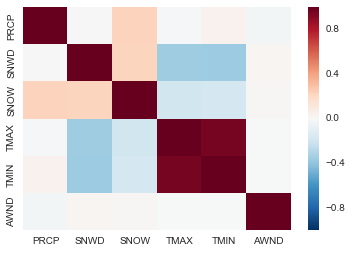

In [102]:
sns.heatmap(df_weather.corr())

In [103]:
trips_df['day_of_year'] = trips_df.start_time.apply(lambda x: x.dayofyear)

In [104]:
df_day = trips_df.groupby('day_of_year').count().reset_index()

In [105]:
df_day.head(1)

,day_of_year,bikeid,previous bikeid,start_time,stop_time,date,hour,tripduration,minutes,previous end station id,...,start station latitude,start station longitude,end station latitude,end station longitude,usertype,birth year,gender,month,weekday,is weekend
0,1,5317,5317,5317,5317,5317,5317,5317,5317,5317,...,5317,5317,5317,5317,5317,4651,5317,5317,5317,5317


In [106]:
df_day.drop(df_day.columns[2:], axis=1, inplace=True)

In [107]:
df_day.head(1)

,day_of_year,bikeid
0,1,5317


In [108]:
df_day.rename(columns={'bikeid':'Total Number of Trips'}, inplace=True)
df_day.head()

,day_of_year,Total Number of Trips
0,1,5317
1,2,11304
2,3,4478
3,4,7849
4,5,14506


In [110]:
df_weather.dtypes

DATE    datetime64[ns]
PRCP           float64
SNWD           float64
SNOW           float64
TMAX             int64
TMIN             int64
AWND           float64
dtype: object

In [113]:
from datetime import date


In [114]:
df_weather = df_weather[(df_weather['DATE']>=date(2015,1,1)) & (df_weather['DATE']<=date(2015,12,31))]  

In [115]:
df_weather.head(1)

,DATE,PRCP,SNWD,SNOW,TMAX,TMIN,AWND
2191,2015-01-01,0.0,0.0,0.0,39,27,7.2


In [116]:
df_weather['avg_T'] = 0.5*(df_weather['TMAX'] + df_weather['TMIN'])

In [117]:
df_weather['day_of_yr'] = df_weather.DATE.apply(lambda x: x.dayofyear)

In [118]:
df_weather = df_weather.drop(['DATE', 'TMAX', 'TMIN'], axis = 1)

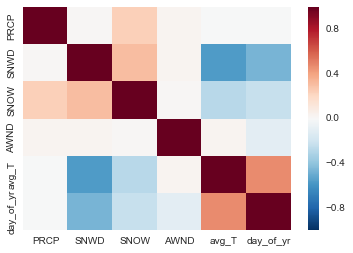

In [119]:
sns.heatmap(df_weather.corr())

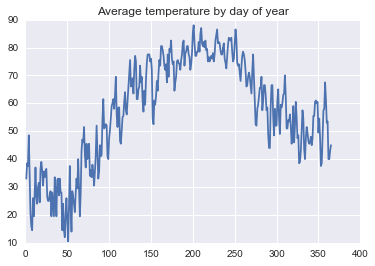

In [121]:
plt.plot(df_weather['day_of_yr'], df_weather['avg_T'])
plt.title('Average temperature by day of year')

In [122]:
def snowed(x):
    if x > 0:
        return 1
    else:
        return 0

df_weather['snowed?'] = df_weather['SNOW'].apply(snowed)

In [123]:
df_weather = df_weather.drop('SNOW', axis = 1)

In [124]:
df_weather.head()

,PRCP,SNWD,AWND,avg_T,day_of_yr,snowed?
2191,0.00,0.0,7.2,33.0,1,0
2192,0.00,0.0,7.2,38.5,2,0
2193,0.71,0.0,6.5,37.5,3,0
2194,0.30,0.0,6.5,48.5,4,0
2195,0.00,0.0,10.5,35.0,5,0


In [125]:
df_day.head()

,day_of_year,Total Number of Trips
0,1,5317
1,2,11304
2,3,4478
3,4,7849
4,5,14506


In [126]:
df_weather = df_weather.reset_index()

In [127]:
del df_weather['index']

In [128]:
df_weather.head()

,PRCP,SNWD,AWND,avg_T,day_of_yr,snowed?
0,0.00,0.0,7.2,33.0,1,0
1,0.00,0.0,7.2,38.5,2,0
2,0.71,0.0,6.5,37.5,3,0
3,0.30,0.0,6.5,48.5,4,0
4,0.00,0.0,10.5,35.0,5,0


In [129]:
df_day_weather = pd.concat([df_day, df_weather], axis=1)


In [130]:
df_day_weather.head()

,day_of_year,Total Number of Trips,PRCP,SNWD,AWND,avg_T,day_of_yr,snowed?
0,1,5317,0.00,0.0,7.2,33.0,1,0
1,2,11304,0.00,0.0,7.2,38.5,2,0
2,3,4478,0.71,0.0,6.5,37.5,3,0
3,4,7849,0.30,0.0,6.5,48.5,4,0
4,5,14506,0.00,0.0,10.5,35.0,5,0


In [131]:
df_day_weather = df_day_weather[ ['day_of_year', 'Total Number of Trips', 'PRCP', 'SNWD', 'avg_T', 'AWND', 'snowed?']]

In [132]:
df_day_weather.head()

,day_of_year,Total Number of Trips,PRCP,SNWD,avg_T,AWND,snowed?
0,1,5317,0.00,0.0,33.0,7.2,0
1,2,11304,0.00,0.0,38.5,7.2,0
2,3,4478,0.71,0.0,37.5,6.5,0
3,4,7849,0.30,0.0,48.5,6.5,0
4,5,14506,0.00,0.0,35.0,10.5,0


In [165]:
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression, Lasso

In [202]:
X = df_day_weather.ix[:, 2:]
X.head()

,PRCP,SNWD,avg_T,AWND,snowed?
0,0.00,0.0,33.0,7.2,0
1,0.00,0.0,38.5,7.2,0
2,0.71,0.0,37.5,6.5,0
3,0.30,0.0,48.5,6.5,0
4,0.00,0.0,35.0,10.5,0


In [203]:
y = df_day_weather.loc[:, 'Total Number of Trips']

In [204]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.5, random_state = 0)

In [205]:
# Simple linear regression model

lr = LinearRegression().fit(X_train, y_train)
predictions = lr.predict(X_test)
print(lr.score(X_test, y_test))

0.672311559824


In [206]:
# Lasso

lasso = Lasso().fit(X_train, y_train)
predictions = lasso.predict(X_test)
print(lasso.score(X_test, y_test))

0.672505999577


In [207]:
list(zip(X_train.columns, list(lasso.coef_)))

[('PRCP', -13320.787349077826),
 ('SNWD', -496.73078721273993),
 ('avg_T', 509.75753510553608),
 ('AWND', 1.1909854763196019),
 ('snowed?', 832.29370420054795)]

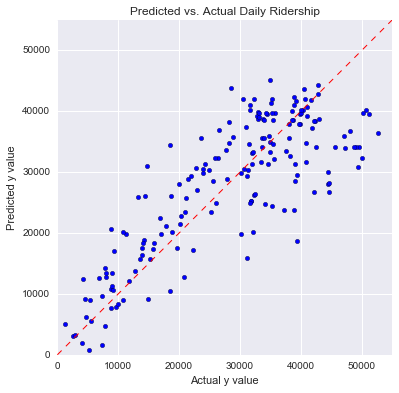

In [208]:
plt.figure(figsize=(6,6))
plt.title('Predicted vs. Actual Daily Ridership')
plt.xlabel('Actual y value')
plt.ylabel('Predicted y value')
plt.ylim(0,55000)
plt.xlim(0,55000)
plt.scatter(y_test, predictions) 
plt.plot(range(55000), range(55000), 'r--', linewidth = 1);

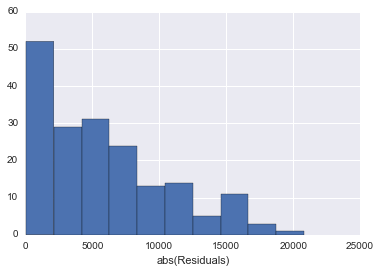

In [209]:
plt.hist(np.abs(predictions - y_test))
plt.xlabel('abs(Residuals)')

In [210]:
y_test.shape[0]

183

In [211]:
X.head()

,PRCP,SNWD,avg_T,AWND,snowed?
0,0.00,0.0,33.0,7.2,0
1,0.00,0.0,38.5,7.2,0
2,0.71,0.0,37.5,6.5,0
3,0.30,0.0,48.5,6.5,0
4,0.00,0.0,35.0,10.5,0


Let's drop the last column (whether it snowed or not)

In [212]:
X = X.drop('snowed?', axis = 1)

In [213]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.5, random_state = 0)

In [214]:
# Simple linear regression model

lr = LinearRegression().fit(X_train, y_train)
predictions = lr.predict(X_test)
print(lr.score(X_test, y_test))

0.674528628888


In [215]:
# Lasso

lasso = Lasso().fit(X_train, y_train)
predictions = lasso.predict(X_test)
print(lasso.score(X_test, y_test))

0.674618313046


Dropping the 'snowed?' column seemed to have had no impact on our result. 

In [216]:
list(zip(X_train.columns, list(lasso.coef_)))

[('PRCP', -13160.876603642031),
 ('SNWD', -475.50228443253951),
 ('avg_T', 508.99710133432512),
 ('AWND', 1.190659807226979)]

The coefficients of our model make sense. We expect less people to ride bikes is there is precipitation or snow on the ground, our data showed that more people ride during the summer (so days with higher avg T), and wind has almost no effect at all on the results. 

We only have 365 data points overall. More data would be useful to get a better performing model. 

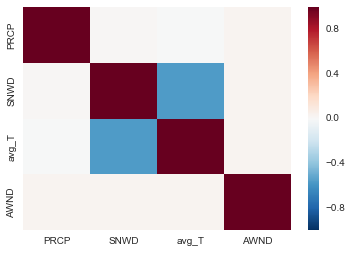

In [217]:
sns.heatmap(X.corr())

## Question 6

_Use sns.jointplot(long, lat, kind='kde') to show where most bike pickups and dropoffs occur. _

_It would be interesting to animate such a plot. I've seen it done before._

In [218]:
trips_df.columns

Index(['bikeid', 'previous bikeid', 'start_time', 'stop_time', 'date', 'hour',
       'tripduration', 'minutes', 'previous end station id',
       'start station id', 'end station id', 'start station latitude',
       'start station longitude', 'end station latitude',
       'end station longitude', 'usertype', 'birth year', 'gender', 'month',
       'weekday', 'is weekend', 'day_of_year'],
      dtype='object')

In [219]:
trips_df.groupby('start station id').count()

,bikeid,previous bikeid,start_time,stop_time,date,hour,tripduration,minutes,previous end station id,end station id,...,start station longitude,end station latitude,end station longitude,usertype,birth year,gender,month,weekday,is weekend,day_of_year
start station id,,,,,,,,,,,,,,,,,,,,,
72,27639,27639,27639,27639,27639,27639,27639,27639,27639,27639,...,27639,27639,27639,27639,23460,27639,27639,27639,27639,27639
79,22808,22808,22808,22808,22808,22808,22808,22808,22808,22808,...,22808,22808,22808,22808,19769,22808,22808,22808,22808,22808
82,9883,9883,9883,9883,9883,9883,9883,9883,9883,9883,...,9883,9883,9883,9883,8078,9883,9883,9883,9883,9883
83,11140,11140,11140,11140,11140,11140,11140,11140,11140,11140,...,11140,11140,11140,11140,8612,11140,11140,11140,11140,11140
116,46381,46381,46381,46381,46381,46381,46381,46381,46381,46381,...,46381,46381,46381,46381,43481,46381,46381,46381,46381,46381
119,1858,1858,1858,1858,1858,1858,1858,1858,1858,1858,...,1858,1858,1858,1858,1554,1858,1858,1858,1858,1858
120,4908,4908,4908,4908,4908,4908,4908,4908,4908,4908,...,4908,4908,4908,4908,4430,4908,4908,4908,4908,4908
127,58719,58719,58719,58719,58719,58719,58719,58719,58719,58719,...,58719,58719,58719,58719,53649,58719,58719,58719,58719,58719
128,43468,43468,43468,43468,43468,43468,43468,43468,43468,43468,...,43468,43468,43468,43468,39358,43468,43468,43468,43468,43468


In [220]:
_.shape[0]

488

In [221]:
start_station_df = trips_df.groupby('start station id').count()

In [222]:
start_station_df.head(1)

,bikeid,previous bikeid,start_time,stop_time,date,hour,tripduration,minutes,previous end station id,end station id,...,start station longitude,end station latitude,end station longitude,usertype,birth year,gender,month,weekday,is weekend,day_of_year
start station id,,,,,,,,,,,,,,,,,,,,,
72,27639,27639,27639,27639,27639,27639,27639,27639,27639,27639,...,27639,27639,27639,27639,23460,27639,27639,27639,27639,27639


In [223]:
start_station_df.bikeid.min(), start_station_df.bikeid.max()

(13, 104813)

In [224]:
start_station_df.bikeid.count()

488

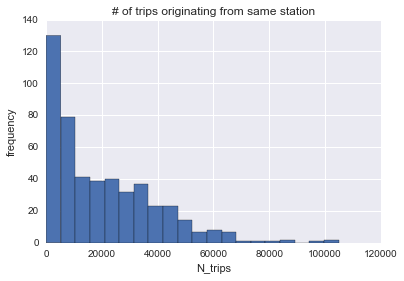

In [225]:
start_station_df.bikeid.hist(bins=20)
plt.ylabel('frequency')
plt.xlabel('N_trips')
plt.title("# of trips originating from same station")

There are a few "high power" stations responsible for originating many trips. 

/Users/ausubo/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


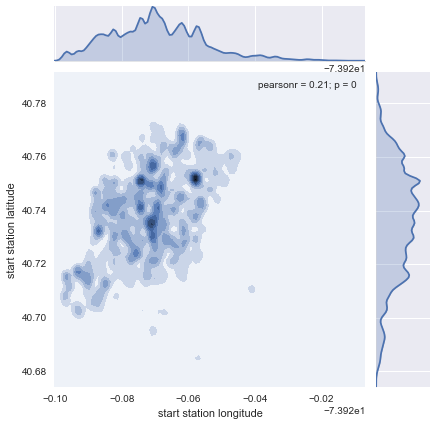

In [226]:
trips_df_sampled = trips_df.sample(500000)

sns.jointplot(trips_df_sampled['start station longitude'],trips_df_sampled['start station latitude'], kind = 'kde')

This would definitely be more informative if I could plot the data on top of a map of NYC. 

However, we can see that there are locations within the serviced areas in NYC with more start trips than others. 

In [227]:
!pwd

/Users/ausubo/ds/my_projects/PRACTICE/citi_bike_data
